<center><font size = "10"> Tutorial 4: <center>
<center><font size = "8"> Multicompartmental Neuron Model  <center> 
<center><font size = "8">Home work: answers<center>

# Ex 1: Attenuation. 

<font size="3">Create a simple morphology with only one section called soma, as it is done in tutorial 01 of this week 4, point 1. Perform a current clamp experiment in which the stimulation has the following parameters: delay 1 ms, amplitude 1 pA and duration 10 ms. Then do the following:
    

    - inject current at the centre and at the end of the soma
    - increase and decrease the number of segments per section
    - manipulate the parameters of the soma (resistance Ra and diameter) and interpret the results

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from neuron import h

--No graphics will be displayed.


In [2]:
def transpose_recording(reclist, nloc, tstop):
    retlist = []
    # each element of reclist is a neuron.h.Vector of recordings for one out of nloc spatial locations
    # (usually compartment centers) over time
    for i in range(0, int(tstop / h.dt) + 1):
        retlist.append(h.Vector(nloc, 0))
        for j in range(0, nloc):
            retlist[i].x[j] = reclist[j].x[i]

    return retlist

In [3]:
def record_soma(nseg, time=1.025, location=0.5, Ra=1, diam=10):
    # Create a section
    soma = h.Section()
    soma.Ra = Ra
    soma.L = 100
    soma.diam = diam
    soma.cm = 1

    # Inject a current step into the soma
    stim = h.IClamp(
        soma(location)
    )  # Place a stimulation electrode in the middle of the soma
    stim.delay = 1  # ms
    stim.amp = 1  # pA
    stim.dur = 10  # ms

    # Initialize and run a simulation
    h.load_file("stdrun.hoc")
    h.finitialize(-65)
    h.continuerun(20)
    h.steps_per_ms = 40.0

    h.init()
    h.run()

    recording_list = h.List()
    soma.nseg = nseg
    # Set the number of segments

    for i in range(0, soma.nseg):
        temporal_recording = h.Vector()
        temporal_recording.record(soma((0.5 + i * 1.0) / soma.nseg)._ref_v)
        recording_list.append(temporal_recording)

    h.init()
    h.run(15)
    xlocations = h.Vector()

    for i in range(0, soma.nseg):
        xlocations.append(soma.L * (0.5 + i * 1.0) / (soma.nseg))

    time_point = int(round(time / 0.025))
    # Record at the desired time point
    spatialrec = transpose_recording(recording_list, soma.nseg, 5)

    return spatialrec, xlocations

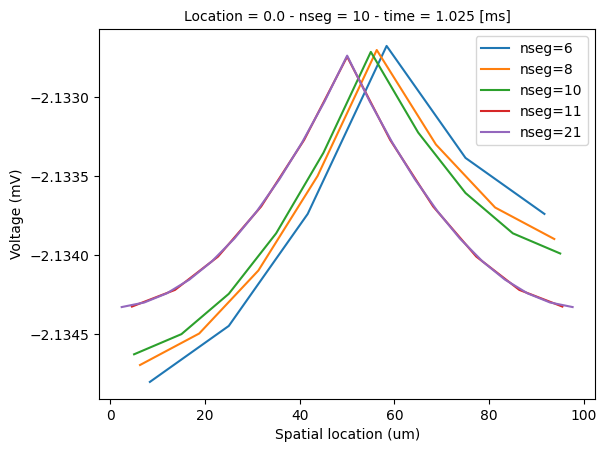

In [4]:
time_point = int(round(2.975 / 0.025))

plt.figure()
for nseg in [6, 8, 10, 11, 21]:
    spatialrec, xlocations = record_soma(nseg=nseg)
    plt.plot(xlocations, spatialrec[time_point], label=f"nseg={nseg}")

plt.ylabel("Voltage (mV)")
plt.xlabel("Spatial location (um)")
plt.title(
    "Location = %.1f - nseg = %.0f - time = %.3f [ms]" % (0, 10, 1.025), fontsize=10
)
plt.legend()

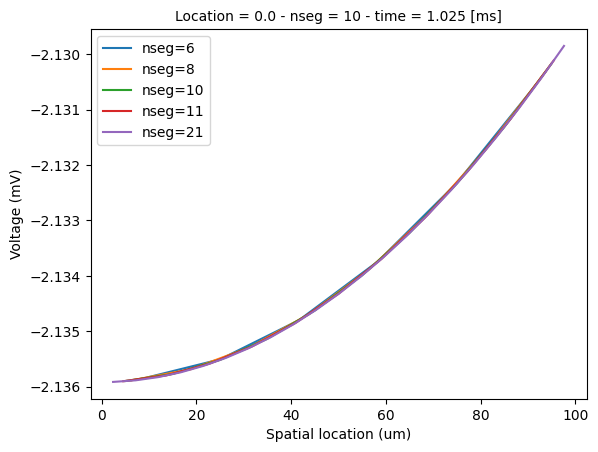

In [5]:
time_point = int(round(2.975 / 0.025))

plt.figure()
for nseg in [6, 8, 10, 11, 21]:
    spatialrec, xlocations = record_soma(nseg=nseg, location=1)
    plt.plot(xlocations, spatialrec[time_point], label=f"nseg={nseg}")

plt.ylabel("Voltage (mV)")
plt.xlabel("Spatial location (um)")
plt.title(
    "Location = %.1f - nseg = %.0f - time = %.3f [ms]" % (0, 10, 1.025), fontsize=10
)
plt.legend()

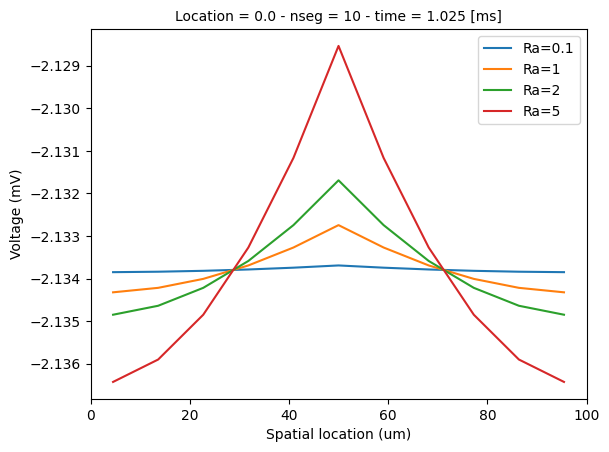

In [6]:
time_point = int(round(2.975 / 0.025))

plt.figure()
for Ra in [0.1, 1, 2, 5]:
    spatialrec, xlocations = record_soma(nseg=11, Ra=Ra)
    plt.plot(xlocations, spatialrec[time_point], label=f"Ra={Ra}")

plt.ylabel("Voltage (mV)")
plt.xlabel("Spatial location (um)")
plt.title(
    "Location = %.1f - nseg = %.0f - time = %.3f [ms]" % (0, 10, 1.025), fontsize=10
)
plt.legend()

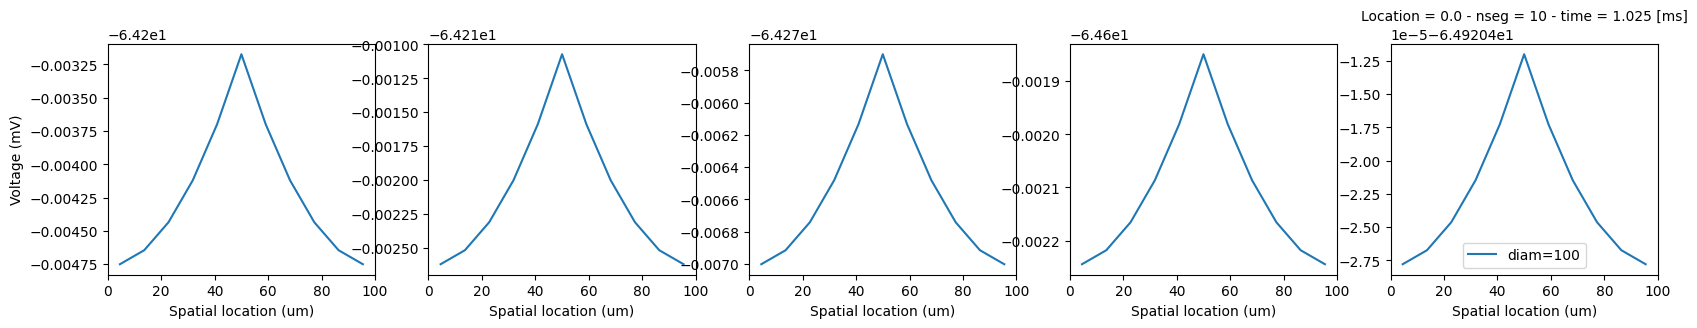

In [7]:
time_point = int(round(1.025 / 0.025))

fig, ax = plt.subplots(1, 5, figsize=(20, 3))
for n, diam in enumerate([10, 10.1, 11, 20, 100]):
    spatialrec, xlocations = record_soma(nseg=11, diam=diam)
    ax[n].plot(xlocations, spatialrec[time_point], label=f"diam={diam}")
    ax[n].set_xlabel("Spatial location (um)")

ax[0].set_ylabel("Voltage (mV)")
plt.title(
    "Location = %.1f - nseg = %.0f - time = %.3f [ms]" % (0, 10, 1.025), fontsize=10
)
plt.legend()

## **Answers**

<font size='3'>__Differences between injections at the end and center of the soma:__

<font size='3'>If we inject the current at different locations, we can observe different voltage curves, with the highest voltage at the injection point, decreasing from the simulation point. 

<font size='3'>__Differences between number of sections:__
    
<font size='3'>Increasing the number of segments changes the smoothness of the curve, by increasing the resolution. The voltage value remains the same, whilst location appears different based on the new resolution. 

<font size='3'>__Differences between parameters:__

- <font size='3'>axial resistance (Ra) - increased axial resistance of the cell increases the voltage at the center of the cell(point of stimulation), whilst the voltage is decreased further from the injection site. This effect is caused by the reduced current flowing from the injection site, causing increased membrane charge at the center and decreased charged at the ends.
- <font size='3'>diameter - does not change the voltage differences between injection site and the end points, but the overall amount of charge changes



# Ex 2: Action Potential Back Propagation. 

<font size='3'> Create a neuron with a soma, an axon with two sections, and a dendrite consisting of a main trunk opening into three branches, each of the branches with different diameters but with the same length. Add passive properties to every section and add active properties (hh) to the soma axon and to the dendrite, but not to the branches. You can use the parameters from tutorial 03. 

<font size='3'> Perform a current clamp experiment in which the soma is stimulated at the center and the dendritic branches and axon are recorded at their ends. Choose the best stimulation parameters to see the signal attenuation in the branches. Visualize and interpret the results.
    
<font size='3'>Explain with your own words:    
   - What are passive and active membrane properties?  
   - What is going on with the voltage signal propagation from the soma to each of the branches? What happens in the axon?
   - What happens if the active properties of the dendrite are removed? 
    
<font size="3"> __Hint:__ Use similar i and V plots to those in tutorial 3, part 3.

In [8]:
# Call all the usefull packages
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neuron import h
from neurom import view
from hoc2swc import neuron2swc

In [9]:
# Global containers for objects
simulations_records = []  # stimulations
voltage_records = []  # voltage recordings
current_records = []  # current recordings


def reset():
    """Convenience functions for setting up stimulation, recording and simulation"""
    del simulations_records[:]
    del voltage_records[:]
    del current_records[:]


def iclamp(location, delay=100, amplitude=0.1, duration=500):
    """"Inject a current step with parameters at location"""
    stim = h.IClamp(location)  # Place a stimulation electrode at location
    stim.delay = delay  # stim delay (ms)
    stim.amp = amplitude  # stim amplitude (pA)
    stim.dur = duration  # stim ducurrent_recordsration (ms)
    simulations_records.append({"stim": stim, "loc": str(location)})


def record_voltage(location):
    """Setup recording of voltage at location"""
    vec = h.Vector()
    vec.record(location._ref_v)  # record voltage at location
    voltage_records.append({"vec": vec, "loc": str(location)})


def record_current(stimulation_dict):
    """Setup recording of stimulation current"""
    vec = h.Vector()
    vec.record(stimulation_dict["stim"]._ref_i)  # record stimulation current
    current_records.append({"vec": vec, "loc": stimulation_dict["loc"]})


def init_run(v_i, t_stop):
    """Initialize and run a simulation"""
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimulation_dict in simulations_records:
        record_current(stimulation_dict)
    # Setup simulation and run
    h.load_file("stdrun.hoc")
    h.finitialize(v_i)  # initial voltage
    h.continuerun(t_stop)  # final time
    return rec_t

In [10]:
def run_simulation(active_properties=True):
    # Create all the parts of the neurons needed
    soma = h.Section(name="soma")
    dend = h.Section(name="dend")
    branches = [h.Section(name=f"branch[{i}]") for i in np.arange(3)]
    axon = [h.Section(name=f"axon[{i}]") for i in np.arange(2)]

    # Geometry
    soma.L = soma.diam = 30
    dend.L = 300
    dend.diam = 3

    for sec in branches:
        sec.L = 300

    branches[0].diam = 5
    branches[1].diam = 1
    branches[2].diam = 0.1

    axon[0].diam = 2
    axon[1].diam = 2

    axon[0].L = 45
    axon[1].L = 100

    # Connect sections
    dend.connect(soma(1))
    for dend_br in branches:
        dend_br.connect(dend(1))

    axon[0].connect(soma(0))
    axon[1].connect(axon[0](1))

    somatic = []
    dendritic = []

    # Add passive properties to every section
    for sec in h.allsec():
        if "soma" in sec.name():
            somatic.append(sec)
        if "dend" in sec.name():
            dendritic.append(sec)
        sec.insert("pas")
        sec.nseg = 1
        for seg in sec:
            seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
            seg.pas.e = -70

    # Add active properties to the soma
    for sec in somatic:
        # insert hh
        sec.insert("hh")
        sec.Ra = 1
        sec.nseg = 1
        for seg in sec:
            seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
            seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

    # Add active properties to the axon
    for axon_ in axon:
        axon_.insert("hh")
        axon_.Ra = 100
        axon_.nseg = 1
        for seg in axon_:
            seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
            seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

    if active_properties:
        # Add active properties to the dendrite
        for sec in dendritic:
            # insert hh
            sec.insert("hh")
            sec.Ra = 1
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

    reset()
    # Scan at different locations with different delays

    # Setup stimulations and recordings
    iclamp(somatic[0](0.5), amplitude=0.46)
    record_voltage(somatic[0](0.5))

    for p in np.arange(3).astype(int):
        record_voltage(branches[p](1))

    for p in np.arange(2).astype(int):
        record_voltage(axon[p](1))

    # Simulate and plot
    v_init = -70
    t_stop = 700

    time_record = init_run(v_init, t_stop)

    return time_record, voltage_records, current_records

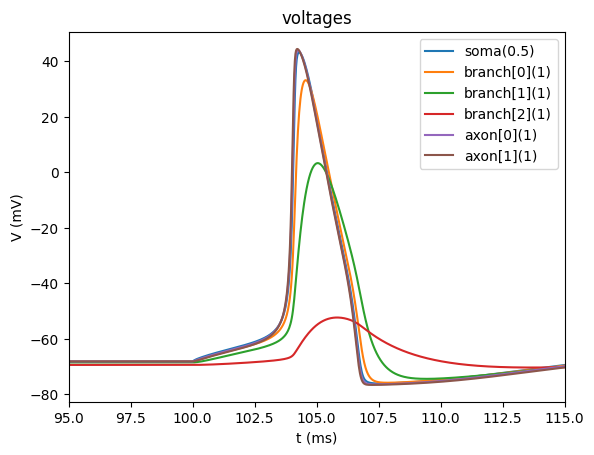

In [11]:
time_record, voltage_records, current_records = run_simulation(
    True
)  # Run the simulation without active properties

plt.figure()
plt.title("voltages")
# plt.ylim((-71, vmax))
plt.ylabel("V (mV)")
plt.xlabel("t (ms)")
for vdict in voltage_records:
    plt.plot(time_record, vdict["vec"], label=vdict["loc"])
plt.legend(loc=1)
plt.xlim(95, 115)
plt.legend()

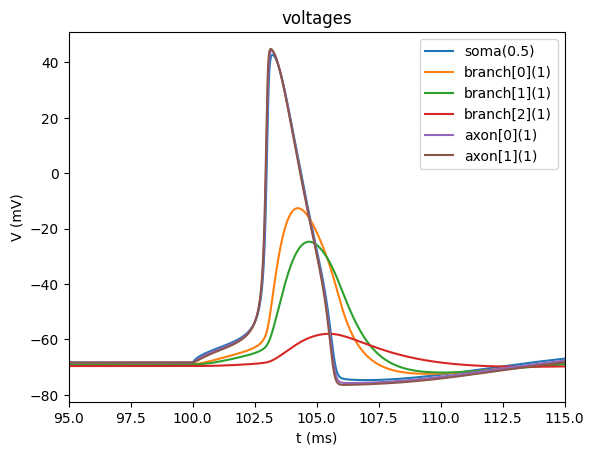

In [12]:
time_record, voltage_records, current_records = run_simulation(
    False
)  # Run the simulation without active properties

plt.figure()
plt.title("voltages")
# plt.ylim((-71, vmax))
plt.ylabel("V (mV)")
plt.xlabel("t (ms)")
for vdict in voltage_records:
    plt.plot(time_record, vdict["vec"], label=vdict["loc"])
plt.legend(loc=1)
plt.xlim(95, 115)
plt.legend()

## **Answers**

<font size="4">
The point of this exercise is visualization of the signal traveling along the dendrite (according to cable equation). Observed responses between the neurites are similar. 

    
__What are passive and active membrane properties?:__ 

- Passive membrane properties refer to cell membrane biophysics, that can be represented as an RC circuit, with resistance and capacitance connected in parallel. The lipid bylayer acts as a membrane capacitance with channels that allow the ions to pass through with certain resistance (membrane resistivity). In case of axons and dendrites, the intracelular axial resistance is a passive membrane property. This property leads to decay of the membrane potential in a distance dependent manner, starting from  the stimulation point. 

- Active membrane properties depend on the activation of voltage gated ion channels, responsible for the action potential generation. 

__What is going on with the voltage signal propagation from the soma to each of the branches? What happens in the axon?__

The signal propagation depends on the distance and on the axial resistance. As all the branches have the same length, we won't see differences on the voltage attenuation between them considering the distance, but we should see differences depending on the dendritic diameter. So the branch with larger diameter (less axial resistance) should attenuate the signal less than the others. The signal in the axons is a feed forward propagation of the action potential from the soma.

    
__What happens if the active properties of the dendrite are removed?__

If the active properties of the dendrite are removed the action potential can not travel along the dendrite. Due to that a large reduction of the amplitude can be noted alongside an increase in delay of the signal. Consequently, the amplitude decreases along the branches and the signal from the soma will hardly or not at all reach their end.

# Ex 3: Dendritic input signal summation in the soma
<font size="3"> Load one of the good morphology files that were given in week 2, for this exercise choose a pyramidal cell. Instantiate it as it is done in tutorial 03. Visualise your cell with a plot.
    
<font size="3"> Perform a current clamp experiment that stimulates all the dendrites (basal and apical) at their midpoints. Play around with the different stimulation parameters: delay, amplitude and duration.

<font size="3"> Read the articles that you can find in the homework folder. Plot results of different stimulation protocols that help you explain: 
    
    - What is dendritic signal integration? And, in your opinion, what is the importance of this in biology? 
    - What happens if you stimulate only apical dendrites? What is the cause of this effect?
    
    
<font size="3"> __Hint:__ Use similar i and V plots to those in tutorial 3, part 4.

In [13]:
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import view
from hoc2swc import neuron2swc

In [14]:
# Global containers for objects
simulations_records = []  # stimulations
voltage_records = []  # voltage recordings
current_records = []  # current recordings


def reset():
    """Convenience functions for setting up stimulation, recording and simulation"""
    del simulations_records[:]
    del voltage_records[:]
    del current_records[:]


def iclamp(location, delay=100, amplitude=0.1, duration=500):
    """"Inject a current step with parameters at location"""
    stim = h.IClamp(location)  # Place a stimulation electrode at location
    stim.delay = delay  # stim delay (ms)
    stim.amp = amplitude  # stim amplitude (pA)
    stim.dur = duration  # stim ducurrent_recordsration (ms)
    simulations_records.append({"stim": stim, "loc": str(location)})


def record_voltage(location):
    """Setup recording of voltage at location"""
    vec = h.Vector()
    vec.record(location._ref_v)  # record voltage at location
    voltage_records.append({"vec": vec, "loc": str(location)})


def record_current(stimulation_dict):
    """Setup recording of stimulation current"""
    vec = h.Vector()
    vec.record(stimulation_dict["stim"]._ref_i)  # record stimulation current
    current_records.append({"vec": vec, "loc": stimulation_dict["loc"]})


def init_run(v_i, t_stop):
    """Initialize and run a simulation"""
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimulation_dict in simulations_records:
        record_current(stimulation_dict)
    # Setup simulation and run
    h.load_file("stdrun.hoc")
    h.finitialize(v_i)  # initial voltage
    h.continuerun(t_stop)  # final time
    return rec_t

In [15]:
class Neuron:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()

    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file("stdlib.hoc")
        h.load_file("import3d.hoc")
        cell = h.Import3d_SWC_read()  # We have a .swc morphology file
        # cell = h.Import3d_Neurolucida3()

        # Read the file and creates automatically section.connect(parent) statements
        cell.input("morph_08_09.swc")

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell, 0)
        self.importedcell.instantiate(None)

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.basal = []
        self.apical = []
        self.axonal = []
        self.all = []
        for sec in h.allsec():
            if "soma" in sec.name():
                self.somatic.append(sec)
            if "dend" in sec.name():
                self.basal.append(sec)
            if "apic" in sec.name():
                self.apical.append(sec)
            if "axon" in sec.name():
                self.axonal.append(sec)

    def define_biophysics(self):
        """
        Distributes passive mechanisms and hh active prop on the soma and dendrites
        """
        # Define passive properties for all sections
        for sec in h.allsec():
            sec.insert("pas")
            sec.nseg = 1
            for seg in sec:
                seg.pas.g = 0.0003  # Conductance of the leak channels (in S/cm2)
                seg.pas.e = -70

        # Define active properties for soma, dendrite, apical dendrite and axon
        for sec in self.somatic:
            # insert hh
            sec.insert("hh")
            sec.Ra = 1
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.basal:
            # insert hh
            sec.insert("hh")
            sec.Ra = 300
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.apical:
            # insert hh
            sec.insert("hh")
            sec.Ra = 400
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

        for sec in self.axonal:
            # insert hh
            sec.insert("hh")
            sec.Ra = 100
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1  # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

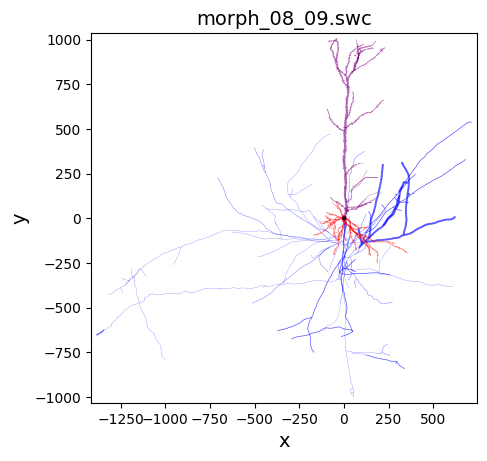

In [16]:
Cell = Neuron()
# Visualize neuron
neuron = nm.load_morphology("morph_08_09.swc")
view.plot_morph(neuron)


In [17]:
reset()

dendrite_list = Cell.basal + Cell.apical

# Setup stimulations and recordings
for idx, dendrites in enumerate(dendrite_list):
    iclamp(dendrites(0.5), amplitude=0.1, delay=100 + idx * 10, duration=50)

record_voltage(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 500  # 700

time_record = init_run(v_init, t_stop)

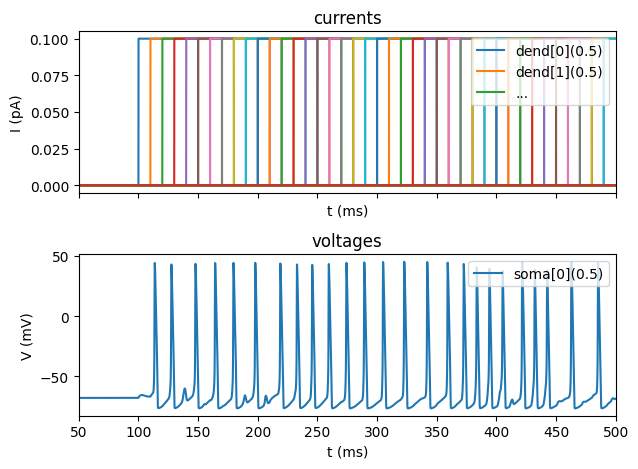

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.set_title("currents")
# ax1.set_ylim((-0.01,imax))
ax1.set_xlabel("t (ms)")
ax1.set_ylabel("I (pA)")
for idict in current_records:
    ax1.plot(time_record, idict["vec"], label=idict["loc"])
handles, labels = ax1.get_legend_handles_labels()

max_nb_legend_entries_shown = 3
ax1.legend(
    handles[:max_nb_legend_entries_shown],
    labels[: max_nb_legend_entries_shown - 1] + ["..."],
    loc=1,
)

ax2.set_title("voltages")
# plt.ylim((-71,vmax))
ax2.set_ylabel("V (mV)")
ax2.set_xlabel("t (ms)")
# ax2.set_xlim(50, 150)
ax2.set_xlim(50, 500)
for vdict in voltage_records:
    ax2.plot(time_record, vdict["vec"], label=vdict["loc"])

ax2.legend(loc=1)
plt.tight_layout()

In [19]:
reset()

dendrite_list = Cell.basal + Cell.apical

# Setup stimulations and recordings
for idx, dendrites in enumerate(dendrite_list):
    # iclamp(dendrites(0.5), amplitude=10, delay=100+idx*50, duration=10)
    iclamp(dendrites(0.5), amplitude=0.1, delay=100 + idx * 50, duration=10)


record_voltage(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 500
time_record = init_run(v_init, t_stop)

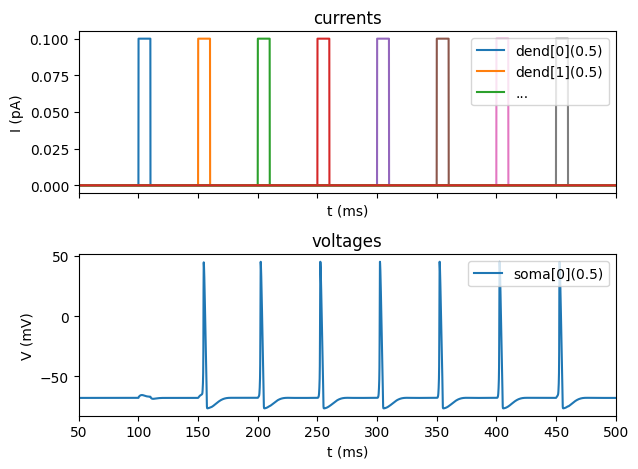

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.set_title("currents")
# ax1.set_ylim((-0.01,imax))
ax1.set_xlabel("t (ms)")
ax1.set_ylabel("I (pA)")
for idict in current_records:
    ax1.plot(time_record, idict["vec"], label=idict["loc"])
handles, labels = ax1.get_legend_handles_labels()

max_nb_legend_entries_shown = 3
ax1.legend(
    handles[:max_nb_legend_entries_shown],
    labels[: max_nb_legend_entries_shown - 1] + ["..."],
    loc=1,
)

ax2.set_title("voltages")
# plt.ylim((-71,vmax))
ax2.set_ylabel("V (mV)")
ax2.set_xlabel("t (ms)")
# ax2.set_xlim(50, 150)
ax2.set_xlim(50, 500)
for vdict in voltage_records:
    ax2.plot(time_record, vdict["vec"], label=vdict["loc"])

ax2.legend(loc=1)
plt.tight_layout()

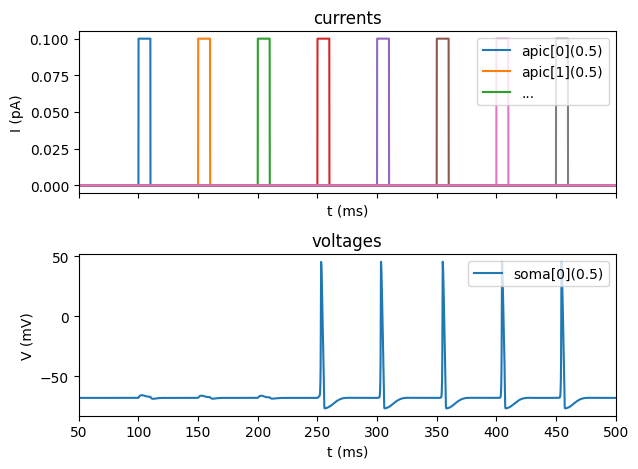

In [21]:
reset()

dendrite_list = Cell.apical

# Setup stimulations and recordings
for idx, dendrites in enumerate(dendrite_list):
    iclamp(dendrites(0.5), amplitude=0.1, delay=100 + idx * 50, duration=10)

record_voltage(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 500
time_record = init_run(v_init, t_stop)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.set_title("currents")
# ax1.set_ylim((-0.01,imax))
ax1.set_xlabel("t (ms)")
ax1.set_ylabel("I (pA)")
for idict in current_records:
    ax1.plot(time_record, idict["vec"], label=idict["loc"])
handles, labels = ax1.get_legend_handles_labels()

max_nb_legend_entries_shown = 3
ax1.legend(
    handles[:max_nb_legend_entries_shown],
    labels[: max_nb_legend_entries_shown - 1] + ["..."],
    loc=1,
)

ax2.set_title("voltages")
# plt.ylim((-71,vmax))
ax2.set_ylabel("V (mV)")
ax2.set_xlabel("t (ms)")
# ax2.set_xlim(50, 150)
ax2.set_xlim(50, 500)
for vdict in voltage_records:
    ax2.plot(time_record, vdict["vec"], label=vdict["loc"])

ax2.legend(loc=1)
plt.tight_layout()

## **Answers**
<font size="4">
The goal of this exercise is to understand what is dendritic signal integration, why is it important and what parameters of the input signal are relevant for the process.
    

__What is dendritic signal integration? And, in your opinion, what is the importance of this in biology?__
    
Dendritic signal integration is a process of summing (integrating) excitatory and inhibitory dendritic inputs. As a result of this process, current arrives at the soma and axon initial segment, where it is integrated further to determine whether an action potential fires or not. The time in which each dendritic spine receives the input, the spatial distribution of the dendritic spines and the cell morphology are parameters that affect the dendritic integration of the signal. Dendritic integration is key, as it determines how a neuron treats input signals and whether the AP is generated or not. Understanding how individual neurons integrate the thousands of synaptic inputs they receive is critical to understanding how the brain works.

__What happens if you stimulate only apical dendrites? What is the cause of this effect?__
    
When stimulating only the apical dendrites, the signal is reduced in comparison to stimulation of the full dendritic tree. This is due to the increased effective resistance of the apical dendrites, which is due to a combination of the increased axial resistivity, and the increased path length from the apical dendrites to the soma.  This also suggests that the geometric parameters of the dendrites influence it's signal integration, therefore the morphology of the dendrite influences the sensitivity of a neuron to incoming inputs.
   